<a href="https://colab.research.google.com/github/breakwa/Model-Learning/blob/main/TCN_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# config

In [165]:

!pip install git+https://github.com/philipperemy/keras-tcn.git@master


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/philipperemy/keras-tcn.git (to revision master) to /tmp/pip-req-build-5t14iuot
  Running command git clone -q https://github.com/philipperemy/keras-tcn.git /tmp/pip-req-build-5t14iuot


In [166]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
import tensorflow as tf
from tcn.tcn import TCN

In [167]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle/' #注意kaggle文件夹包含json文件
 
os.chdir('/content/drive/MyDrive/kaggle/') #切换到kaggle文件夹

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range
 
 
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

In [169]:
milk = pd.read_csv('/content/drive/MyDrive/Network Analytics.csv', index_col=0, parse_dates=True)
milk = normalization(milk)
print(milk.head())
milk = milk.values  # just keep np array here for simplicity.

                     OutboundUtilzation (%)
Timestamp                                  
2017-10-10 07:01:00                0.962485
2017-10-10 07:21:00                0.991176
2017-10-10 07:26:00                0.972936
2017-10-10 07:31:00                0.980330
2017-10-10 07:36:00                0.995308


In [170]:
from keras.callbacks import History 
history = History()

# 1 step pred

(25567, 64, 1)
(25567, 1)
[[0.51176079]
 [0.48188243]
 [0.87708541]
 ...
 [0.05389427]
 [0.35506167]
 [0.5888253 ]]
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_12 (TCN)                (None, 64)                91136     
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 91,201
Trainable params: 91,201
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/20
799/799 - 11s - loss: 0.1870 - 11s/epoch - 14ms/step
Epoch 2/20
799/799 - 10s - loss: 0.0734 - 10s/epoch - 12ms/step
Epoch 3/20
799/799 - 5s - loss: 0.0677 - 5s/epoch - 6ms/step
Epoch 4/20
799/799 - 5s - loss: 0.0654 - 5s/epoch - 6ms/step
Epoch 5/20
799/799 - 6s - loss: 0.0633 - 6s/epoch - 7ms/step
Epoch 6/2

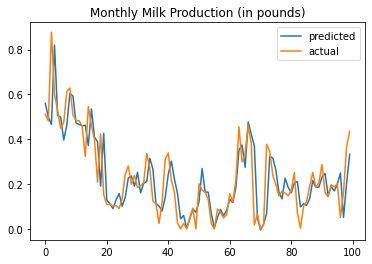

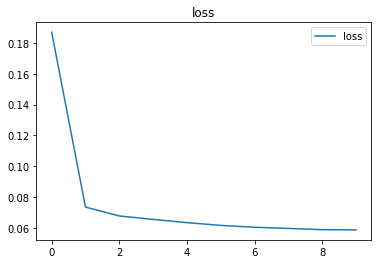

In [171]:
# https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line


##
# It's a very naive (toy) example to show how to do time series forecasting.
# - There are no training-testing sets here. Everything is training set for simplicity.
# - There is no input/output normalization.
# - The model is simple.
##



lookback_window = 64  # months.



x, y = [], []
for i in range(lookback_window, len(milk)):
    x.append(milk[i - lookback_window:i])
    y.append(milk[i])
x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)
print(y)
# noinspection PyArgumentEqualDefault
model = Sequential([
    TCN(input_shape=(lookback_window, 1),
        kernel_size=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    Dense(1, activation='linear')
])

model.summary()
model.compile('adam', 'mae',)

print('Train...')
model.fit(x, y, epochs=20, verbose=2, callbacks=[history])

p = model.predict(x)

p = p[:100]
y = y[:100]
plt.plot(p)
plt.plot(y)
plt.title('Monthly Milk Production (in pounds)')
plt.legend(['predicted', 'actual'])
plt.show()


plt.plot(history.history['loss'][:10])
plt.title('loss')
plt.legend(['loss',])
plt.show()



In [172]:
x.shape,y.shape

((25567, 64, 1), (100, 1))

# try merge curve

In [173]:
milk = pd.read_csv('/content/drive/MyDrive/Network Analytics.csv', index_col=0, parse_dates=True)
milk = normalization(milk)
print(milk.head())
milk = milk.values  # just keep np array here for simplicity.

                     OutboundUtilzation (%)
Timestamp                                  
2017-10-10 07:01:00                0.962485
2017-10-10 07:21:00                0.991176
2017-10-10 07:26:00                0.972936
2017-10-10 07:31:00                0.980330
2017-10-10 07:36:00                0.995308


(25567, 64, 1)
(25567, 1)
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_13 (TCN)                (None, 64)                181376    
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 181,441
Trainable params: 181,441
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/20
799/799 - 7s - loss: 0.1519 - 7s/epoch - 9ms/step
Epoch 2/20
799/799 - 5s - loss: 0.0749 - 5s/epoch - 7ms/step
Epoch 3/20
799/799 - 5s - loss: 0.0707 - 5s/epoch - 7ms/step
Epoch 4/20
799/799 - 5s - loss: 0.0631 - 5s/epoch - 7ms/step
Epoch 5/20
799/799 - 10s - loss: 0.0630 - 10s/epoch - 12ms/step
Epoch 6/20
799/799 - 5s - loss: 0.0624 - 5s/epoch - 7ms/step
Epoch 7/20
799/799 - 5s - loss: 0.0603 

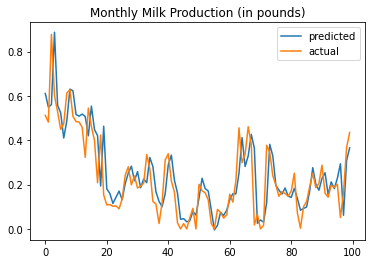

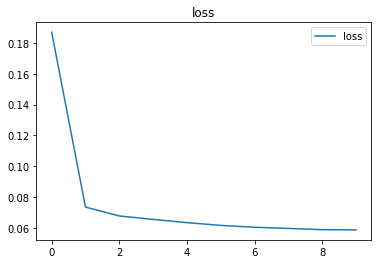

In [174]:
# https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line


##
# It's a very naive (toy) example to show how to do time series forecasting.
# - There are no training-testing sets here. Everything is training set for simplicity.
# - There is no input/output normalization.
# - The model is simple.
##

lookback_window = 64  # months.



x, y = [], []
for i in range(lookback_window, len(milk)):
    x.append(milk[i - lookback_window:i])
    y.append(milk[i])
x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)

# noinspection PyArgumentEqualDefault
model = Sequential([
    TCN(input_shape=(lookback_window, 1),
        kernel_size=4,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    Dense(1, activation='linear')
])

model.summary()
model.compile('adam', 'mae')

print('Train...')
model.fit(x, y, epochs=20, verbose=2, callbacks=[history])

p = model.predict(x)

p = p[:100]
y = y[:100]
plt.plot(p)
plt.plot(y)
plt.title('Monthly Milk Production (in pounds)')
plt.legend(['predicted', 'actual'])
plt.show()


plt.plot(history.history['loss'][:10])
plt.title('loss')
plt.legend(['loss',])
plt.show()


# try to concatenate


In [175]:
milk = pd.read_csv('/content/drive/MyDrive/Network Analytics.csv', index_col=0, parse_dates=True)
milk = normalization(milk)
print(milk.head())
milk = milk.values  # just keep np array here for simplicity.

                     OutboundUtilzation (%)
Timestamp                                  
2017-10-10 07:01:00                0.962485
2017-10-10 07:21:00                0.991176
2017-10-10 07:26:00                0.972936
2017-10-10 07:31:00                0.980330
2017-10-10 07:36:00                0.995308


(25567, 64, 1)
(25567, 1)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 64, 1)]      0           []                               
                                                                                                  
 input2 (InputLayer)            [(None, 64, 1)]      0           []                               
                                                                                                  
 tcn_14 (TCN)                   (None, 64)           181376      ['input1[0][0]']                 
                                                                                                  
 tcn_15 (TCN)                   (None, 64)           91136       ['input2[0][0]']                 
                                                                  

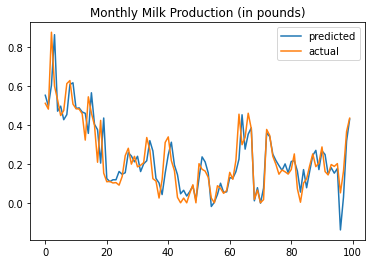

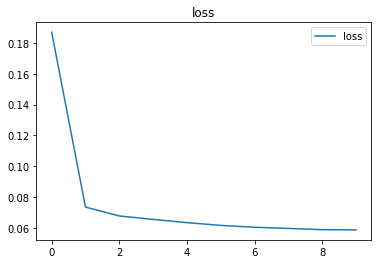

In [176]:
# https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line


##
# It's a very naive (toy) example to show how to do time series forecasting.
# - There are no training-testing sets here. Everything is training set for simplicity.
# - There is no input/output normalization.
# - The model is simple.
##

lookback_window = 64  # months.



x, y = [], []
for i in range(lookback_window, len(milk)):
    x.append(milk[i - lookback_window:i])
    y.append(milk[i])
x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)

# noinspection PyArgumentEqualDefault

input1_= tf.keras.Input(shape=(lookback_window, 1), name='input1')
input2_ = tf.keras.Input((lookback_window, 1), name='input2')


input1 = TCN(
        kernel_size=4,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        )(input1_)
large_size_model = Dense(1, activation='linear')(input1)
input2 = TCN(
        kernel_size=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        )(input2_)
small_size_model = Dense(1, activation='linear')(input2)
added = tf.keras.layers.concatenate([large_size_model, small_size_model])


model_output = Dense(1, activation='linear')(added)





model =  tf.keras.models.Model(inputs=[input1_,input2_], outputs=model_output)

model.summary()
model.compile('adam', 'mae')

print('Train...')
model.fit([x,x], y, epochs=20, verbose=2, callbacks=[history])

p = model.predict([x,x])

p = p[:100]
y = y[:100]
plt.plot(p)
plt.plot(y)
plt.title('Monthly Milk Production (in pounds)')
plt.legend(['predicted', 'actual'])
plt.show()


plt.plot(history.history['loss'][:10])
plt.title('loss')
plt.legend(['loss',])
plt.show()


# 3 muti step pred test

In [177]:

milk = pd.read_csv('/content/drive/MyDrive/Network Analytics.csv', index_col=0, parse_dates=True)

print(milk.head())

lookback_window = 12  # months.
pred_window = 3  # months.

# milk = milk.values # just keep np array here for simplicity.

x, y = [], []
for i in range(lookback_window, len(milk)-pred_window,pred_window):
    x.append(milk[i - lookback_window:i])
    y.append(milk[i:i+pred_window])

x,y
x = np.array(x,dtype=object).astype(np.float32)
y = np.array(y,dtype=object).astype(np.float32)
y = y.squeeze()





np.set_printoptions(threshold=5)
print(x.shape)
print(y.shape)

                     OutboundUtilzation (%)
Timestamp                                  
2017-10-10 07:01:00                 96.2442
2017-10-10 07:21:00                 99.1131
2017-10-10 07:26:00                 97.2892
2017-10-10 07:31:00                 98.0286
2017-10-10 07:36:00                 99.5263
(8539, 12, 1)
(8539, 3)


In [178]:

# noinspection PyArgumentEqualDefault
model = Sequential([
    TCN(input_shape=(lookback_window, 1),
        kernel_size=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    Dense(pred_window, activation='linear')
])

model.summary()
model.compile('adam', 'mae')

print('Train...')
model.fit(x, y, epochs=100, verbose=2)


Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_16 (TCN)                (None, 64)                91136     
                                                                 
 dense_19 (Dense)            (None, 3)                 195       
                                                                 
Total params: 91,331
Trainable params: 91,331
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/100
267/267 - 3s - loss: 27.3210 - 3s/epoch - 12ms/step
Epoch 2/100
267/267 - 2s - loss: 10.6117 - 2s/epoch - 6ms/step
Epoch 3/100
267/267 - 2s - loss: 10.2302 - 2s/epoch - 6ms/step
Epoch 4/100
267/267 - 2s - loss: 9.5603 - 2s/epoch - 6ms/step
Epoch 5/100
267/267 - 2s - loss: 9.2849 - 2s/epoch - 6ms/step
Epoch 6/100
267/267 - 2s - loss: 9.0120 - 2s/epoch - 6ms/step
Epoch 7/100
267/267 - 2s - loss: 8.8014 - 2s/epoch - 6ms/ste

KeyboardInterrupt: ignored

In [ ]:

p = model.predict(x)
p = p.flatten()
y = y.flatten()
p = p[:100]
y = y[:100]
plt.plot(p)
plt.plot(y)
plt.title('Monthly Milk Production (in pounds)')
plt.legend(['predicted', 'actual'])
plt.show()

In [ ]:
x.shape,y.shape

# TCN summary
## 1.  训练集即测试集（仅仅是过拟合）
## 2.  3-step-tcn 是将3步变成三维进行预测，从原理上有点小问题，即通过1-12预测13-15；但最好还是return_sequence = true,然后迭代预测，此时也是通过1-12预测13-15，没有新的点加入（即非自回归预测模型 ACF PACF）。

# lstm 1 step

![Imgur](https://i.imgur.com/FAGMvlc.png)
https://en.wikipedia.org/wiki/Long_short-term_memory

hidden state(also known as output of lstm units)restricted from minus one to one!!

In [179]:
milk = pd.read_csv('/content/drive/MyDrive/Network Analytics.csv', index_col=0, parse_dates=True)
milk = normalization(milk)
print(milk.head())
milk = milk.values  # just keep np array here for simplicity.

                     OutboundUtilzation (%)
Timestamp                                  
2017-10-10 07:01:00                0.962485
2017-10-10 07:21:00                0.991176
2017-10-10 07:26:00                0.972936
2017-10-10 07:31:00                0.980330
2017-10-10 07:36:00                0.995308


In [180]:

# milk = pd.read_csv('/content/drive/MyDrive/Network Analytics.csv', index_col=0, parse_dates=True)
# milk = normalization(milk)  #数据标准归一化
# print(milk.head())

lookback_window = 64  # months.

# milk = milk.values  # just keep np array here for simplicity.

x, y = [], []
for i in range(lookback_window, len(milk)):
    x.append(milk[i - lookback_window:i])
    y.append(milk[i])
x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)


(25567, 64, 1)
(25567, 1)


In [ ]:
y


In [181]:

# noinspection PyArgumentEqualDefault
model = Sequential([tf.keras.layers.LSTM(1,input_shape=(lookback_window, 1)),
      ])

model.summary()
model.compile('adam', 'mae')

print('Train...')
model.fit(x, y, epochs=20, verbose=2, callbacks=[history])


Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 1)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/20
799/799 - 5s - loss: 0.4999 - 5s/epoch - 7ms/step
Epoch 2/20
799/799 - 3s - loss: 0.1915 - 3s/epoch - 4ms/step
Epoch 3/20
799/799 - 3s - loss: 0.1309 - 3s/epoch - 4ms/step
Epoch 4/20
799/799 - 3s - loss: 0.0943 - 3s/epoch - 4ms/step
Epoch 5/20
799/799 - 3s - loss: 0.0870 - 3s/epoch - 4ms/step
Epoch 6/20
799/799 - 3s - loss: 0.0830 - 3s/epoch - 4ms/step
Epoch 7/20
799/799 - 3s - loss: 0.0795 - 3s/epoch - 4ms/step
Epoch 8/20
799/799 - 3s - loss: 0.0765 - 3s/epoch - 4ms/step
Epoch 9/20
799/799 - 3s - loss: 0.0738 - 3s/epoch - 4ms/step
Epoch 10/20
799/799 - 3s - 

In [182]:
y[:100]

array([[0.51176079],
       [0.48188243],
       [0.87708541],
       ...,
       [0.16329294],
       [0.36659919],
       [0.43514831]])

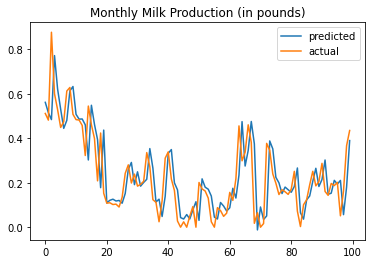

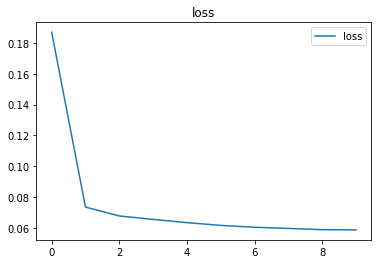

In [183]:

p = model.predict(x)
p = p[:100,-1]
y = y[:100]
plt.plot(p)
plt.plot(y)
plt.title('Monthly Milk Production (in pounds)')
plt.legend(['predicted', 'actual'])
plt.show()


plt.plot(history.history['loss'][:10])
plt.title('loss')
plt.legend(['loss',])
plt.show()


因为只有12个可调参数，根本学习不到特征


# lstm 3 step

In [ ]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return ((data - np.min(data)) / _range)

In [ ]:

milk = pd.read_csv('/content/drive/MyDrive/Network Analytics.csv', index_col=0, parse_dates=True)
milk = normalization(milk)  #数据标准归一化
print(milk.head())

lookback_window = 64  # months.
pred_window = 3  # months.

milk = milk.values # just keep np array here for simplicity.

x, y = [], []
for i in range(lookback_window, len(milk)-pred_window,pred_window):
    x.append(milk[i - lookback_window:i])
    y.append(milk[i:i+pred_window])

x,y
x = np.array(x,dtype=object).astype(np.float32)
y = np.array(y,dtype=object).astype(np.float32)
y = y.squeeze()





np.set_printoptions(threshold=5)
print(x.shape)
print(y.shape)

In [ ]:

# noinspection PyArgumentEqualDefault
model = Sequential([tf.keras.layers.LSTM(3,input_shape=(lookback_window, 1))

])

model.summary()
model.compile('adam', 'mae')

print('Train...')
model.fit(x, y, epochs=100, verbose=2)


In [ ]:

p = model.predict(x)
p = p.flatten()
y = y.flatten()
plt.plot(p)
plt.plot(y)
plt.title('Monthly Milk Production (in pounds)')
plt.legend(['predicted', 'actual'])
plt.show()